<a href="https://colab.research.google.com/github/Davioliveira1305/Redes-Complexas/blob/main/Trabalho_de_Redes_Complexas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão 1 - Criação e visualização das Redes

## Importação das bibliotecas necessárias.

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
df = pd.read_csv('D:\Trabalho 1 - Redes Complexas\paulista_2013_2023 (1).csv', sep = ';')

<>:7: SyntaxWarning: invalid escape sequence '\T'
<>:7: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Davi\AppData\Local\Temp\ipykernel_5316\3383886878.py:7: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv('D:\Trabalho 1 - Redes Complexas\paulista_2013_2023 (1).csv', sep = ';')


## Criação das 2 redes a serem analisadas:  
*   G1 = Rede utilizando o peso 1;
*   G2 = Rede utilizando o peso 2;




In [ ]:
# Rede utilizando o peso 1
G1 = nx.DiGraph()

# Rede utilizando o peso 2
G2 = nx.DiGraph()

# Adição dos vértices e das arestas
for i in range(len(df)):
  v1 = df['home'][i]
  v2 = df['away'][i]
  G1.add_edge(v1, v2, weight = df['weight1'][i])
  G2.add_edge(v1, v2, weight = df['weight2'][i])


## Visualização das Redes

In [ ]:

def plot_rede(grafo):
    fig, ax = plt.subplots(1,1,figsize=(15,10))
    # network
    G = grafo
    # layout position
    pos = nx.kamada_kawai_layout(G)
    # draw edges
    nx.draw_networkx_edges(G,
                        pos=pos,
                        edge_color = 'lightgray',
                        alpha=0.4,
                        ax=ax)
    # draw nodes
    nodes = nx.draw_networkx_nodes(G,
                                node_size=1000,
                                pos=pos,
                                cmap=plt.cm.jet,
                                ax=ax)
    # draw labels
    nx.draw_networkx_labels(G,
                            pos=pos,
                            font_color='black',
                            ax=ax)
    plt.axis("off")
    plt.show()


## Visualização da Rede 1

c:\Users\Davi\AppData\Local\Programs\Python\Python312\Lib\site-packages\networkx\drawing\layout.py:725: RuntimeWarning: divide by zero encountered in divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3), meanwt, dim)
c:\Users\Davi\AppData\Local\Programs\Python\Python312\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


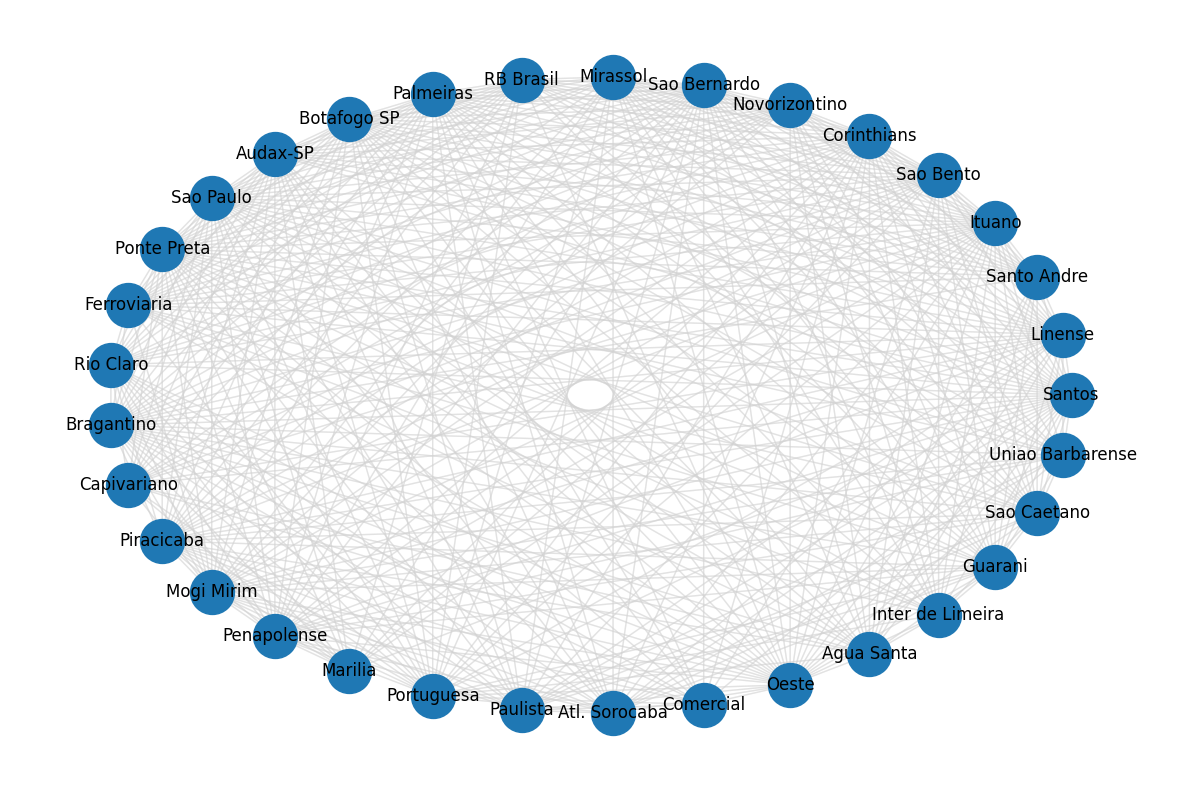

In [ ]:
plot_rede(G1)

## Visualiazação da Rede 2

c:\Users\Davi\AppData\Local\Programs\Python\Python312\Lib\site-packages\networkx\drawing\layout.py:725: RuntimeWarning: divide by zero encountered in divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3), meanwt, dim)


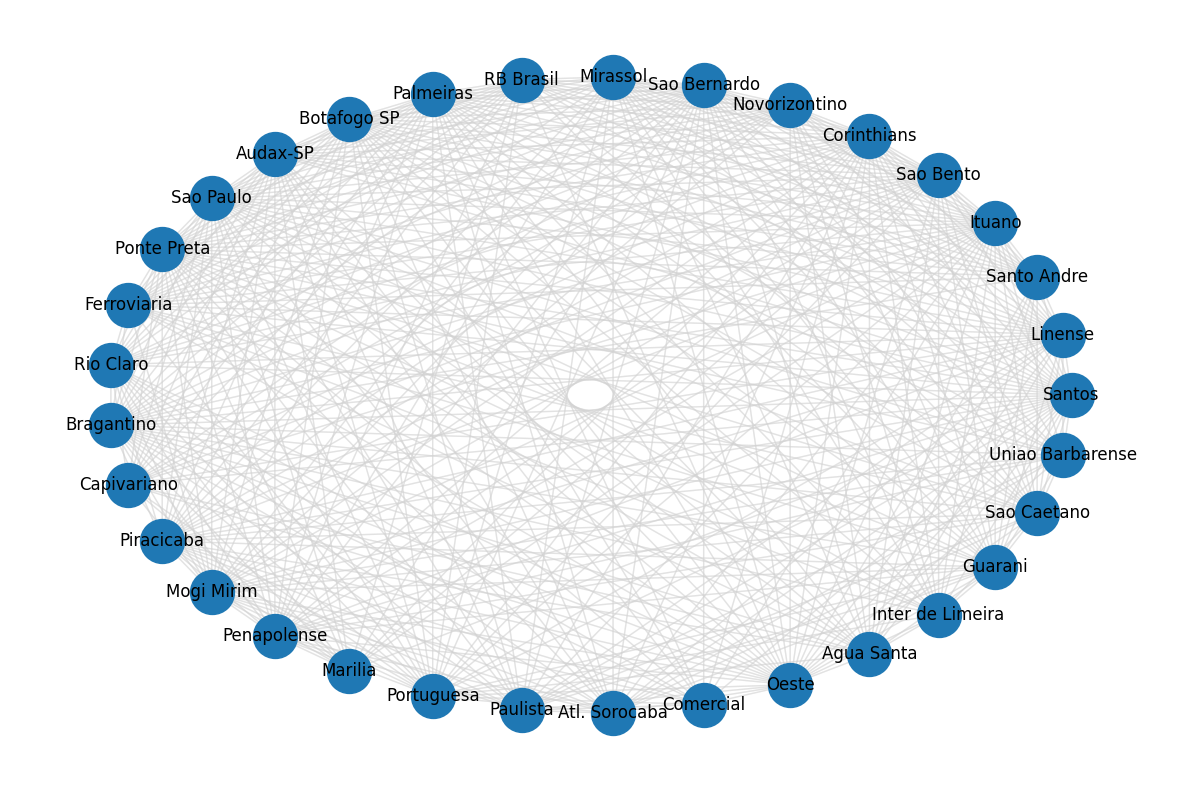

In [ ]:
plot_rede(G2)

## Número de Vértices e Arestas das redes

In [ ]:
print(f"G1 tem {nx.number_of_nodes(G1)} vértices e {nx.number_of_edges(G1)} de arestas")
print(f"G1 tem {nx.number_of_nodes(G2)} vértices e {nx.number_of_edges(G2)} de arestas")

G1 tem 33 vértices e 858 de arestas
G1 tem 33 vértices e 858 de arestas


## Gráfico das Redes

In [ ]:
# Se soma_feitos = True a função retorna um dicionário contendo os gols/pontos feitos por cada equipe
def soma_gols_pts(grafo, feito = True):
    chaves = list(grafo.nodes())
    # Dicionário que vai guardar o total de gols/pontos feitos por cada equipe
    feitos = {chave: 0 for chave in chaves}
    # Dicionário que vai guardar o total de gols/pontos feitos por cada equipe
    sofridos = {chave: 0 for chave in chaves}
    for i in chaves:
        soma_feitos = 0
        soma_sofridos = 0
        # Loop que será usado para calcular os gols feitos e sofridos por cada equipe
        for j in range(len(list(grafo.nodes())) - 1):
            comp = list(grafo.nodes())[j]
            try:
                soma_feitos = soma_feitos + grafo.get_edge_data(comp, i)['weight']
                soma_sofridos = soma_sofridos + grafo.get_edge_data(i, comp)['weight']
            except TypeError:
                continue
        feitos[i] = soma_feitos
        sofridos[i] = soma_sofridos
    if feito == True: return feitos
    else: return sofridos

# Função que será usada para plotar um gráfico de barras
def plot_gols(dicionario, feitos = True):
    # Extraindo chaves e valores do dicionário
    keys = list(dicionario.keys())
    values = list(dicionario.values())

    # Criando o gráfico de barras
    plt.figure(figsize=(10, 6))  # Define o tamanho da figura
    plt.bar(keys, values, color='skyblue')

    # Adicionando título e rótulos aos eixos
    plt.title('Gols por cada equipe')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Times')
    if feitos == True:
        plt.ylabel('Gols feitos')
    else: plt.ylabel('Gols sofridos')
    # Exibindo o gráfico
    plt.show()

def plot_pontos(dicionario, feitos = True):
    # Extraindo chaves e valores do dicionário
    keys = list(dicionario.keys())
    values = list(dicionario.values())

    # Criando o gráfico de barras
    plt.figure(figsize=(10, 6))  # Define o tamanho da figura
    plt.bar(keys, values, color='skyblue')

    # Adicionando título e rótulos aos eixos
    plt.title('POntos por cada equipe')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Times')
    if feitos == True:
        plt.ylabel('Pontos feitos')
    else: plt.ylabel('Pontos sofridos')
    # Exibindo o gráfico
    plt.show()


### Gols no total feitos por cada equipe

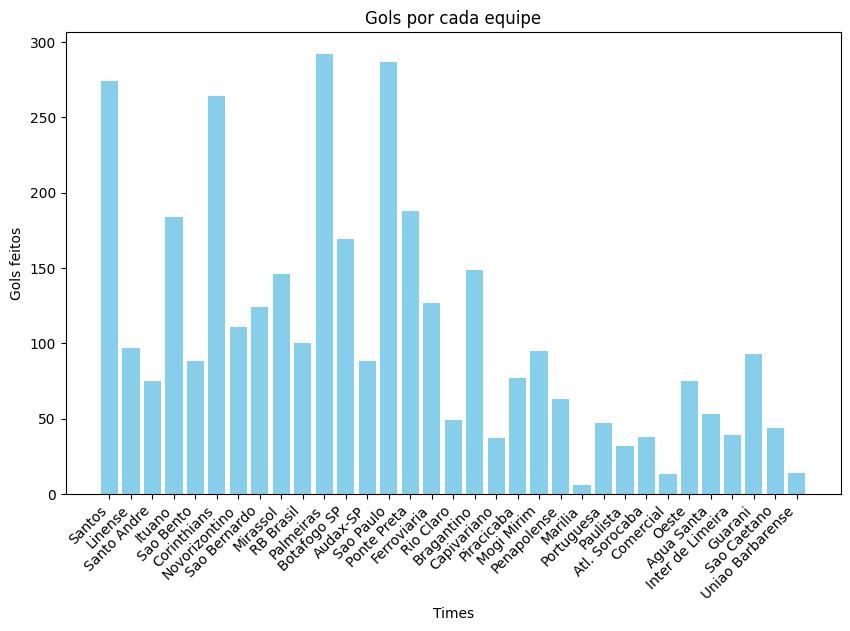

In [ ]:
gols_feitos = soma_gols_pts(G1)
plot_gols(gols_feitos)

### Gols sofridos no total por cada equipe

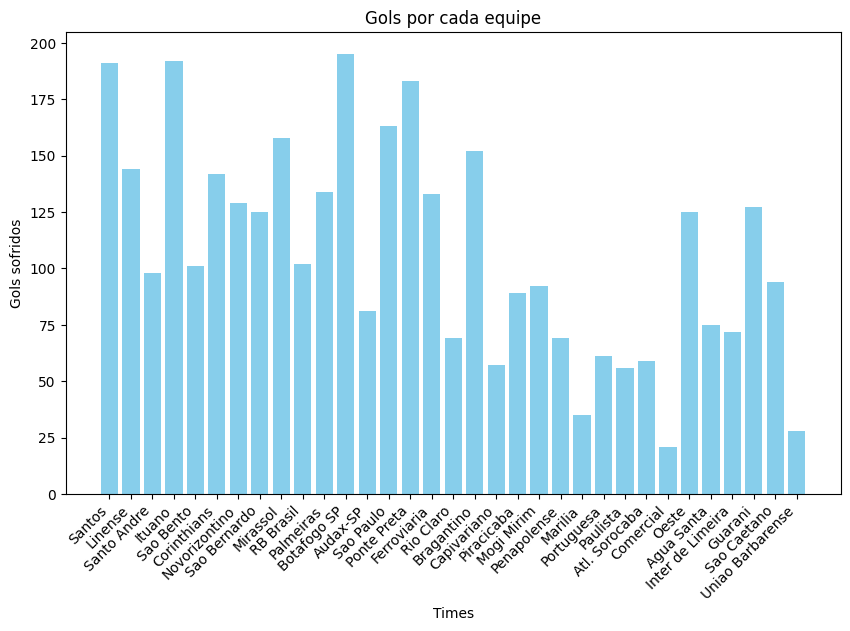

In [ ]:
gols_sofridos = soma_gols_pts(G1, feito = False)
plot_gols(gols_sofridos, feitos = False)

### Pontos no total feitos por cada equipe

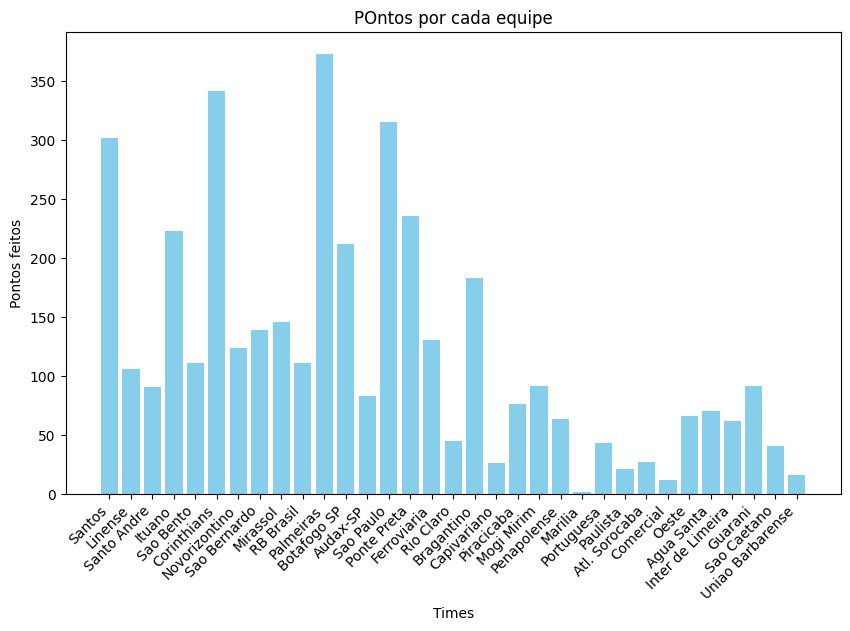

In [ ]:
pontos_feitos = soma_gols_pts(G2)
plot_pontos(pontos_feitos)

### Pontos no total sofridos por cada equipe

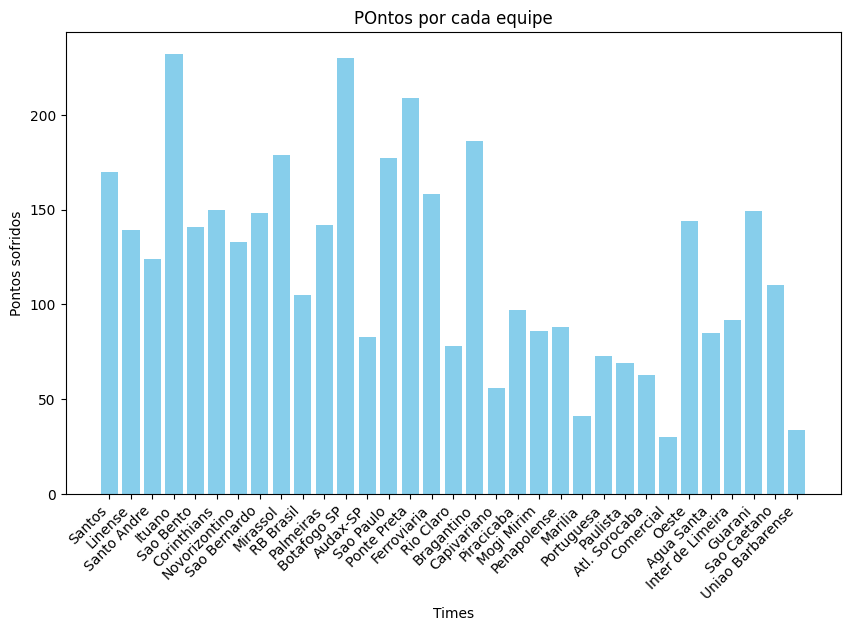

In [ ]:
pontos_sofridos = soma_gols_pts(G2, feito = False)
plot_pontos(pontos_sofridos, feitos = False)

# Questão 2 - Métricas Globais das Redes

## Densidade

Ambas as redes possuem densidades iguais e elevadas, indicando que são bastante densas, como demonstrado nos gráficos.

In [ ]:
print(f"A densidade de G1 é igual = {nx.density(G1)}")
print(f"A densidade de G2 é igual = {nx.density(G2)}")

A densidade de G1 é igual = 0.8125
A densidade de G2 é igual = 0.8125


## Diâmetro

O diâmetro corresponde ao valor de maior excentricidade(métrica que vai avaliada posteriormente) de um grafo. Tanto para o diâmetro como para a excentricidade, o parâmetro que vai ser utilizado para o cálculo dessas métricas é o peso das arestas.

In [ ]:
print(f"O diâmetro de G1 é igual a {nx.diameter(G1, weight= 'weight')}")
print(f"O diâmetro de G2 é igual a {nx.diameter(G2, weight='weight')}")

O diâmetro de G1 é igual a 3.0
O diâmetro de G2 é igual a 4.0


## Comprimento médio dos caminhos

Como os pesos das arestas foram utilizados para calcular o comprimento médio dos caminhos, há uma pequena diferença nos valores encontrados em comparação com um cálculo que não considera os pesos.

Considerar os pesos das arestas proporciona uma análise mais detalhada e realista das distâncias geodésicas na rede, oferecendo uma compreensão mais profunda das dinâmicas e eficiências de conexão entre os nós.

In [ ]:
print(f"O comprimento médio dos caminhos de G1 é {nx.average_shortest_path_length(G1, weight = 'weight')}")
print(f"O comprimento médio dos caminhos de G2 é {nx.average_shortest_path_length(G2, weight = 'weight')}")

O comprimento médio dos caminhos de G1 é 0.41950757575757575
O comprimento médio dos caminhos de G2 é 0.39204545454545453


## Coesão e Agrupamento

Ambas as redes possuem um coeficiente de agrupamento total iguais, tendo como valor 0.8588764044943821, isso indica que a rede possui uma forte tendência a formar clusters. Em outras palavras, há uma alta probabilidade de que os vizinhos de um nó sejam também vizinhos entre si.

In [ ]:
# calculando os coeficientes de agrupamento total
print(f"Coeficiente de agrupamento total de G1 é igual a {nx.transitivity(G1)}")
print(f"Coeficiente de agrupamento total de G2 é igual a {nx.transitivity(G2)}")

Coeficiente de agrupamento total de G1 é igual a 0.8588764044943821
Coeficiente de agrupamento total de G2 é igual a 0.8588764044943821


## Reciprocidade

Como em ambas as redes para cada aresta do nó A para o nó B, há uma correspondente aresta do nó B para o nó A, isso significa uma reciprocidade igual a 1, pois a reciprocidade em uma rede direcionada (onde as arestas têm direção) mede a proporção de arestas que são bidirecionais, sendo 1 o maior valor que pode-se obter.

In [ ]:
print(f"Reciprocidade de G1 = {nx.reciprocity(G1)}")
print(f"Reciprocidade de G2 = {nx.reciprocity(G2)}")

Reciprocidade de G1 = 1.0
Reciprocidade de G2 = 1.0


## Distribuição de Graus

A distribuição de graus indica a quantidade de vértices que possuem um determinado grau.

In [ ]:
print(f"Distribuição de Graus de G1 = {nx.degree_histogram(G1)}")
print(f"Distribuição de Graus de G2 = {nx.degree_histogram(G2)}")
for index, value in enumerate(nx.degree_histogram(G1)):
  print(f"Tem {value} vértices de grau {index}")

Distribuição de Graus de G1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 5, 0, 1, 0, 3, 0, 3, 0, 1, 0, 0, 0, 5, 0, 5]
Distribuição de Graus de G2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 5, 0, 1, 0, 3, 0, 3, 0, 1, 0, 0, 0, 5, 0, 5]
Tem 0 vértices de grau 0
Tem 0 vértices de grau 1
Tem 0 vértices de grau 2
Tem 0 vértices de grau 3
Tem 0 vértices de grau 4
Tem 0 vértices de grau 5
Tem 0 vértices de grau 6
Tem 0 vértices de grau 7
Tem 0 vértices de grau 8
Tem 0 vértices de grau 9
Tem 0 vértices de grau 10
Tem 0 vértices de grau 11
Tem 0 vértices de grau 12
Tem 0 vértices de grau 13
Tem 0 vértices de grau 14
Tem 0 vértices de grau 15
Tem 0 vértices de grau 16
Tem 0 vértices de grau 17
Tem 0 vértices de grau 18
Tem 0 vértices de grau 19
Tem 0 vértices de grau 20
Tem 0 vértic

# Questão 3 - Métricas de Centralidade e Outras Métricas Locais

## Excentricidade

Em ambas as redes, observa-se excentricidades baixas, indicando que qualquer nó na rede pode ser alcançado a partir de outro em poucos passos, pois a excentricidade de um nó em um grafo é a maior distância geodésia mínima entre esse nó e qualquer outro nó no grafo.

OBS: Foi considerado os pesos entre as arestas como parâmetro.

In [ ]:
# calculo da excentricidade do grafo
def exct(grafo):
  ec = nx.eccentricity(grafo, weight = 'weight')
  for chave, valor in ec.items():
      print(f"Excentricidade de {chave} = {valor}")
print(f"=========================== Excentricidades de G1 ====================================")
print(exct(G1))
print(f"=========================== Excentricidades de G2 ====================================")
print(exct(G2))

=========================== Excentricidades de G1 ====================================
Excentricidade de Santos = 2.0
Excentricidade de Linense = 2.0
Excentricidade de Santo Andre = 2.0
Excentricidade de Ituano = 2.0
Excentricidade de Sao Bento = 2.0
Excentricidade de Corinthians = 2.0
Excentricidade de Novorizontino = 2.0
Excentricidade de Sao Bernardo = 2.0
Excentricidade de Mirassol = 3.0
Excentricidade de RB Brasil = 2.0
Excentricidade de Palmeiras = 2.0
Excentricidade de Botafogo SP = 2.0
Excentricidade de Audax-SP = 2.0
Excentricidade de Sao Paulo = 2.0
Excentricidade de Ponte Preta = 2.0
Excentricidade de Ferroviaria = 3.0
Excentricidade de Rio Claro = 2.0
Excentricidade de Bragantino = 2.0
Excentricidade de Capivariano = 2.0
Excentricidade de Piracicaba = 2.0
Excentricidade de Mogi Mirim = 2.0
Excentricidade de Penapolense = 2.0
Excentricidade de Marilia = 3.0
Excentricidade de Portuguesa = 2.0
Excentricidade de Paulista = 2.0
Excentricidade de Atl. Sorocaba = 2.0
Excentricidad

##  Periferia e Centro

A periferia de um grafo são os vértices que apresentam valores de excentricidades iguais ao diâmetro.

Centro de um grafo são os vértices que tem valores de excentricidades iguais ao raio(menor excentricidade de um grafo).

Quando se trata da excentricidade tem-se muitos vértices centrais e poucos vértices periféricos nas duas redes analisadas.

In [ ]:
periferia = nx.periphery(G1, weight='weight')
print("É periferia de G1 os vértices:")
for i in periferia:
    print(i)
periferia = nx.periphery(G2, weight='weight')
print("É periferia de G2 os vértices:")
for i in periferia:
    print(i)
centro = nx.center(G1, weight = 'weight')
print('É centro de G1 os vértices:')
for i in centro:
    print(i)
centro = nx.center(G2, weight = 'weight')
print('É centro de G2 os vértices:')
for i in centro:
    print(i)

É periferia de G1 os vértices:
Mirassol
Ferroviaria
Marilia
É periferia de G2 os vértices:
Mirassol
Marilia
É centro de G1 os vértices:
Santos
Linense
Santo Andre
Ituano
Sao Bento
Corinthians
Novorizontino
Sao Bernardo
RB Brasil
Palmeiras
Botafogo SP
Audax-SP
Sao Paulo
Ponte Preta
Rio Claro
Bragantino
Capivariano
Piracicaba
Mogi Mirim
Penapolense
Portuguesa
Paulista
Atl. Sorocaba
Comercial
Oeste
Agua Santa
Inter de Limeira
Guarani
Sao Caetano
Uniao Barbarense
É centro de G2 os vértices:
Santos
Linense
Santo Andre
Ituano
Sao Bento
Corinthians
Novorizontino
Sao Bernardo
RB Brasil
Palmeiras
Botafogo SP
Audax-SP
Sao Paulo
Ponte Preta
Ferroviaria
Rio Claro
Bragantino
Capivariano
Piracicaba
Mogi Mirim
Penapolense
Portuguesa
Paulista
Atl. Sorocaba
Comercial
Oeste
Agua Santa
Inter de Limeira
Guarani
Sao Caetano
Uniao Barbarense


## Centralidade de Excentricidade

Como as excentricidades das redes eram baixas, tem-se valores altos de centralidade de excentricidade, o que significa que a maioria vértices desempenham um papel central na conectividade global da rede, o que também pode observado quando a periferia e o centro das redes foram calculadas.

OBS: Foi considerado os pesos entre as arestas como parâmetro.

In [ ]:
# calculo da centralidade de excentricidade do grafo
def ce_exct(grafo):
  ec = nx.eccentricity(grafo, weight = 'weight')
  for chave, valor in ec.items():
      print(f"centralidade de excentricidade de {chave} = {1/valor}")
print(f"=========================== Centralidades de Excentricidades de G1 ====================================")
print(ce_exct(G1))
print(f"=========================== Centralidades de Excentricidades de G2 ====================================")
print(ce_exct(G2))

=========================== Centralidades de Excentricidades de G1 ====================================
centralidade de excentricidade de Santos = 0.5
centralidade de excentricidade de Linense = 0.5
centralidade de excentricidade de Santo Andre = 0.5
centralidade de excentricidade de Ituano = 0.5
centralidade de excentricidade de Sao Bento = 0.5
centralidade de excentricidade de Corinthians = 0.5
centralidade de excentricidade de Novorizontino = 0.5
centralidade de excentricidade de Sao Bernardo = 0.5
centralidade de excentricidade de Mirassol = 0.3333333333333333
centralidade de excentricidade de RB Brasil = 0.5
centralidade de excentricidade de Palmeiras = 0.5
centralidade de excentricidade de Botafogo SP = 0.5
centralidade de excentricidade de Audax-SP = 0.5
centralidade de excentricidade de Sao Paulo = 0.5
centralidade de excentricidade de Ponte Preta = 0.5
centralidade de excentricidade de Ferroviaria = 0.3333333333333333
centralidade de excentricidade de Rio Claro = 0.5
centralid

## Centralidade de Proximidade

Pelo observado nos valores de centralidade de proximidade dos vértices das redes, nota-se que há poucos vértices considerados periféricos, pois a maioria dos vértices possuem uma centralidade de proximidade bastante alta, vértices que possuem centralidade de proximidade alta são chamados de vértices centrais.

In [ ]:
def ce_prox(Grafo):
  cp = nx.closeness_centrality(Grafo)
  for chave, valor in cp.items():
    print(f"Centralidade de Proximidade do vértice {chave} = {valor}")
print(f"=========================== Centralidades de Proximidades de G1 ====================================")
print(ce_prox(G1))
print(f"=========================== Centralidades de Proximidades de G2 ====================================")
print(ce_prox(G2))

=========================== Centralidades de Proximidades de G1 ====================================
Centralidade de Proximidade do vértice Santos = 1.0
Centralidade de Proximidade do vértice Linense = 0.9142857142857143
Centralidade de Proximidade do vértice Santo Andre = 0.7441860465116279
Centralidade de Proximidade do vértice Ituano = 1.0
Centralidade de Proximidade do vértice Sao Bento = 0.8888888888888888
Centralidade de Proximidade do vértice Corinthians = 1.0
Centralidade de Proximidade do vértice Novorizontino = 0.8205128205128205
Centralidade de Proximidade do vértice Sao Bernardo = 1.0
Centralidade de Proximidade do vértice Mirassol = 0.8648648648648649
Centralidade de Proximidade do vértice RB Brasil = 0.8205128205128205
Centralidade de Proximidade do vértice Palmeiras = 0.9696969696969697
Centralidade de Proximidade do vértice Botafogo SP = 0.9696969696969697
Centralidade de Proximidade do vértice Audax-SP = 0.8648648648648649
Centralidade de Proximidade do vértice Sao Pau

## Centralidade Harmônica

A centralidade harmônica dos vértices também indica que há poucos vértices consideramos periféricos.

In [ ]:
def ce_har(grafo):
  ch = nx.harmonic_centrality(grafo)
  for chave, valor in ch.items():
    print(f"Centralidade harmônica do vértice {chave} = {valor}")
print(f"=========================== Centralidades harmônicas de G1 ====================================")
print(ce_har(G1))
print(f"=========================== Centralidades harmônicas de G2 ====================================")
print(ce_har(G2))

=========================== Centralidades harmônicas de G1 ====================================
Centralidade harmônica do vértice Rio Claro = 28.5
Centralidade harmônica do vértice Ponte Preta = 32.0
Centralidade harmônica do vértice Mirassol = 29.5
Centralidade harmônica do vértice Ituano = 32.0
Centralidade harmônica do vértice Sao Paulo = 31.5
Centralidade harmônica do vértice Penapolense = 28.5
Centralidade harmônica do vértice Oeste = 31.5
Centralidade harmônica do vértice Guarani = 29.5
Centralidade harmônica do vértice Mogi Mirim = 30.0
Centralidade harmônica do vértice Uniao Barbarense = 25.5
Centralidade harmônica do vértice Capivariano = 25.5
Centralidade harmônica do vértice Palmeiras = 31.5
Centralidade harmônica do vértice Portuguesa = 29.0
Centralidade harmônica do vértice Novorizontino = 28.5
Centralidade harmônica do vértice Paulista = 27.0
Centralidade harmônica do vértice Corinthians = 32.0
Centralidade harmônica do vértice RB Brasil = 28.5
Centralidade harmônica do v

## Centralidade de Intermediação

A Centralidade de Intermediação avalia a importância dos nós com base em sua capacidade de intermediar ou controlar o fluxo de informações em uma rede. Ao analisar essa métrica em ambas as redes, observa-se uma variabilidade nos valores, indicando diferentes graus de centralidade de intermediação entre os nós.

OBS: Foi considerado os pesos entre as arestas como parâmetro.

In [ ]:
def ce_inter(grafo):
  cb = nx.betweenness_centrality(grafo,normalized = True, weight = 'weight')
  for chave, valor in cb.items():
    print(f"Centralidade de intermediação do vértice {chave} = {valor}")
print(f"=========================== Centralidades Intermediação de G1 ====================================")
print(ce_inter(G1))
print(f"=========================== Centralidades Intermediação de G2 ====================================")
print(ce_inter(G2))

=========================== Centralidades Intermediação de G1 ====================================
Centralidade de intermediação do vértice Santos = 0.0
Centralidade de intermediação do vértice Linense = 0.06087425968342017
Centralidade de intermediação do vértice Santo Andre = 0.07330112460270168
Centralidade de intermediação do vértice Ituano = 0.03666837998941747
Centralidade de intermediação do vértice Sao Bento = 0.09002991909207962
Centralidade de intermediação do vértice Corinthians = 0.0
Centralidade de intermediação do vértice Novorizontino = 0.0002087454074615589
Centralidade de intermediação do vértice Sao Bernardo = 0.7436448446739368
Centralidade de intermediação do vértice Mirassol = 0.0
Centralidade de intermediação do vértice RB Brasil = 0.0
Centralidade de intermediação do vértice Palmeiras = 0.0
Centralidade de intermediação do vértice Botafogo SP = 0.0
Centralidade de intermediação do vértice Audax-SP = 0.41182861552735067
Centralidade de intermediação do vértice Sao

Centralidade de intermediação do vértice Santos = 0.020774290495186795
Centralidade de intermediação do vértice Linense = 0.3015070447708341
Centralidade de intermediação do vértice Santo Andre = 0.00808687880433195
Centralidade de intermediação do vértice Ituano = 0.11622953089262769
Centralidade de intermediação do vértice Sao Bento = 0.03859527510046866
Centralidade de intermediação do vértice Corinthians = 0.0
Centralidade de intermediação do vértice Novorizontino = 0.06864169257367768
Centralidade de intermediação do vértice Sao Bernardo = 0.006822761959944142
Centralidade de intermediação do vértice Mirassol = 0.0
Centralidade de intermediação do vértice RB Brasil = 0.10058738002219081
Centralidade de intermediação do vértice Palmeiras = 0.0
Centralidade de intermediação do vértice Botafogo SP = 0.0
Centralidade de intermediação do vértice Audax-SP = 1.0238929423327328
Centralidade de intermediação do vértice Sao Paulo = 0.0
Centralidade de intermediação do vértice Ponte Preta = 

## Índice K-Shell

O índice de k-shell é uma medida de centralidade em redes complexas que avalia a importância dos nós com base na sua participação em camadas cada vez mais internas da rede, observa-se que em ambas as redes, os vértices possuem valores de k-shell semelhantes, isso pode indicar que eles desempenham papéis semelhantes em termos de centralidade e influência na rede.

In [ ]:
def ind_k_shell(grafo):
    nucleos = nx.core_number(grafo)
    for chave, valor in nucleos.items():
        print(f"O índice k-shell do vértice {chave} = {valor}")
print(f"=========================== Índices Shell de G1 ====================================")
print(ind_k_shell(G1))
print(f"=========================== Índices Shell de G2 ====================================")
print(ind_k_shell(G2))

=========================== Índices Shell de G1 ====================================
O índice k-shell do vértice Santos = 40
O índice k-shell do vértice Linense = 40
O índice k-shell do vértice Santo Andre = 40
O índice k-shell do vértice Ituano = 40
O índice k-shell do vértice Sao Bento = 40
O índice k-shell do vértice Corinthians = 40
O índice k-shell do vértice Novorizontino = 40
O índice k-shell do vértice Sao Bernardo = 40
O índice k-shell do vértice Mirassol = 40
O índice k-shell do vértice RB Brasil = 40
O índice k-shell do vértice Palmeiras = 40
O índice k-shell do vértice Botafogo SP = 40
O índice k-shell do vértice Audax-SP = 40
O índice k-shell do vértice Sao Paulo = 40
O índice k-shell do vértice Ponte Preta = 40
O índice k-shell do vértice Ferroviaria = 40
O índice k-shell do vértice Rio Claro = 40
O índice k-shell do vértice Bragantino = 40
O índice k-shell do vértice Capivariano = 36
O índice k-shell do vértice Piracicaba = 40
O índice k-shell do vértice Mogi Mirim = 40


## Centralidade de Autovetor

A centralidade de autovetor é uma medida de centralidade que avalia a importância dos nós com base na sua conexão com outros nós importantes na rede. Nota-se que há uma certa variabilidade de centralidade de autovetor nos vértices de ambas as redes.

OBS: Foi considerado os pesos entre as arestas como parâmetro.


In [ ]:
def ce_auto(grafo):
    cev = nx.eigenvector_centrality_numpy(grafo, weight = 'weight')
    for chave, valor in cev.items():
        print(f"Centralidade de Autovetor do vértice {chave} = {valor}")
print(f"=========================== Centralidades de Autovetor de G1 ====================================")
print(ce_auto(G1))
print(f"=========================== Centralidades de Autovetor de G2 ====================================")
print(ce_auto(G2))

=========================== Centralidades de Autovetor de G1 ====================================
Centralidade de Autovetor do vértice Santos = 0.3508506249019961
Centralidade de Autovetor do vértice Linense = 0.12092034204371595
Centralidade de Autovetor do vértice Santo Andre = 0.11330445737415684
Centralidade de Autovetor do vértice Ituano = 0.24720932558806302
Centralidade de Autovetor do vértice Sao Bento = 0.1125361748560511
Centralidade de Autovetor do vértice Corinthians = 0.3682277090481437
Centralidade de Autovetor do vértice Novorizontino = 0.15441197592098055
Centralidade de Autovetor do vértice Sao Bernardo = 0.13587073575427078
Centralidade de Autovetor do vértice Mirassol = 0.19997989043114306
Centralidade de Autovetor do vértice RB Brasil = 0.13223339664196188
Centralidade de Autovetor do vértice Palmeiras = 0.3905415558325387
Centralidade de Autovetor do vértice Botafogo SP = 0.19744309809871552
Centralidade de Autovetor do vértice Audax-SP = 0.11327901149058048
Centra

## Centralidade de Katz

A Centralidade de Katz é uma extensão da centralidade de autovetor, que considera não apenas as conexões diretas de um nó, mas também as conexões indiretas por meio de outros nós na rede.

OBS: Foi considerado os pesos entre as arestas como parâmetro.

In [ ]:
alpha = 0.5
beta = 1
def ce_katz(grafo, alpha, beta):
    ck = nx.katz_centrality_numpy(G1, alpha=alpha, beta=beta, weight = 'weight')
    for chave, valor in ck.items():
        print(f"Centralidade de Katz do vértice {chave} = {valor}")
print(f"=========================== Centralidades de Katz de G1 ====================================")
print(ce_katz(G1, alpha, beta))
print(f"=========================== Centralidades de Katz de G2 ====================================")
print(ce_katz(G2, alpha, beta))

=========================== Centralidades de Katz de G1 ====================================
Centralidade de Katz do vértice Santos = -0.03619289104280083
Centralidade de Katz do vértice Linense = -0.16696443791461804
Centralidade de Katz do vértice Santo Andre = 0.1778344446675191
Centralidade de Katz do vértice Ituano = -0.03928244522820342
Centralidade de Katz do vértice Sao Bento = 0.0255268847867074
Centralidade de Katz do vértice Corinthians = -0.29043458660912963
Centralidade de Katz do vértice Novorizontino = -0.023698605605844508
Centralidade de Katz do vértice Sao Bernardo = 0.15346848319950124
Centralidade de Katz do vértice Mirassol = 0.11572568071746821
Centralidade de Katz do vértice RB Brasil = -0.07922144945499796
Centralidade de Katz do vértice Palmeiras = -0.18047252519035667
Centralidade de Katz do vértice Botafogo SP = 0.24933161752276167
Centralidade de Katz do vértice Audax-SP = 0.20594141814521386
Centralidade de Katz do vértice Sao Paulo = -0.009165222146751362


## PageRank

De acordo com a centralidade de Katz, o fato de que algum vértice importante está ligado a um dado vértice dá
alta importância a este dado vértice, independente de quantas ligações na rede possui aquele vértice importante. Uma métrica de centralidade que lida com este problema é o PageRank que assume que a importância
de um nó é dividida igualmente entre os seus vizinhos para os quais ele possui ligação. (Trecho retirado do material da disciplina).

In [ ]:
alpha = 0.8
def page_rank(grafo, alpha):
    pr = nx.pagerank(grafo, alpha=alpha, weight = 'weight')
    for chave, valor in pr.items():
        print(f"PageRank do vértice {chave} = {valor}")
print(f"=========================== PageRank de G1 ====================================")
print(page_rank(G1, alpha))
print(f"=========================== PageRank de G2 ====================================")
print(page_rank(G2, alpha))

=========================== PageRank de G1 ====================================
PageRank do vértice Santos = 0.06986330849424373
PageRank do vértice Linense = 0.02910084765399172
PageRank do vértice Santo Andre = 0.02313672802575128
PageRank do vértice Ituano = 0.047617038081360426
PageRank do vértice Sao Bento = 0.02635233621822726
PageRank do vértice Corinthians = 0.06743604748775785
PageRank do vértice Novorizontino = 0.030490598926135384
PageRank do vértice Sao Bernardo = 0.03199804952472151
PageRank do vértice Mirassol = 0.03883219192794132
PageRank do vértice RB Brasil = 0.028819664632604394
PageRank do vértice Palmeiras = 0.07167984360112975
PageRank do vértice Botafogo SP = 0.042755580486323067
PageRank do vértice Audax-SP = 0.027430521546975367
PageRank do vértice Sao Paulo = 0.06845037374633718
PageRank do vértice Ponte Preta = 0.049196647213437854
PageRank do vértice Ferroviaria = 0.03423786218368562
PageRank do vértice Rio Claro = 0.016967366314381116
PageRank do vértice Br

## Coeficiente de Agrupamento Local

Um coeficiente de agrupamento local próximo a 0 indica que os vizinhos do nó não estão altamente conectados entre si. Isso pode ser contraditório, pois quando foi calculado o Coeficiente de Agrupamento Total das redes, em ambas, foi encontrado um valor próximo de 1. Isso se deve pelo fato que o parâmetro utilizado para calcular o Coeficiente de Agrupamento Local foi o peso entre as arestas.


In [ ]:
def cof_al(grafo):
    cal = nx.clustering(grafo, weight='weight')
    for chave, valor in cal.items():
        print(f"Coeficiente de agrupamento local do vértice {chave} = {valor}")

print(f"=========================== Coeficiente de Agrupamento Local de G1 ====================================")
print(cof_al(G1))
print(f"=========================== Coeficiente de Agrupamento Local de G2 ====================================")
print(cof_al(G2))

=========================== Coeficiente de Agrupamento Local de G1 ====================================
Coeficiente de agrupamento local do vértice Santos = 0.17885592540236503
Coeficiente de agrupamento local do vértice Linense = 0.1273946474331463
Coeficiente de agrupamento local do vértice Santo Andre = 0.15019378939876601
Coeficiente de agrupamento local do vértice Ituano = 0.14842379479960732
Coeficiente de agrupamento local do vértice Sao Bento = 0.11346544337683151
Coeficiente de agrupamento local do vértice Corinthians = 0.15910068571689426
Coeficiente de agrupamento local do vértice Novorizontino = 0.16036582766434854
Coeficiente de agrupamento local do vértice Sao Bernardo = 0.10208874573639673
Coeficiente de agrupamento local do vértice Mirassol = 0.17124404310004193
Coeficiente de agrupamento local do vértice RB Brasil = 0.13709501909684307
Coeficiente de agrupamento local do vértice Palmeiras = 0.16748314804068684
Coeficiente de agrupamento local do vértice Botafogo SP = 0

## Coeficiente de Agrupamento Local Médio

O Coeficiente de Agrupamento Local Médio como o nome já diz, será a média aritmética dos valores do Coeficiente de Agrupamento Local dos vértices das redes.

In [ ]:
print(f"Coeficiente de Agrupamento Local Médio de G1 = {nx.average_clustering(G1, weight = 'weight')}")
print(f"Coeficiente de Agrupamento Local Médio de G2 = {nx.average_clustering(G2, weight='weight')}")

Coeficiente de Agrupamento Local Médio de G1 = 0.1179642415531353
Coeficiente de Agrupamento Local Médio de G2 = 0.08319217278129262


## Função genérica que será usada para rankear as métricas

In [ ]:
def rank(dicionario):
    # Ordenar em ordem decrescente as chaves do dicionário
    chaves_ordenadas = sorted(dicionario, key=lambda chave: dicionario[chave], reverse=True)
    # Lista que será retornada contendo o vértice a métrica obtida
    rank = []
    # Pega os 5 melhores vértices relacionado a métrica desejada
    for i in range(0, 5):
        chave = chaves_ordenadas[i]
        rank.append([chave, dicionario[chave]])
    return rank

## Rank relacionado a Excentricidade

Os vértices que apresentaram maiores excentricidades em G1 foram os vértices Mirassol, Ferroviaria, Marilia, Santos e Linense, já em G2 foram os vértices Mirassol, Marilia, Santos, Linense e Santo André. Esse ranqueamento não diz tanta coisa, pois não há uma grande variabilidade de valores de excentricidade dos vértices de ambas as redes, como foi mostrado anteriormente.

In [ ]:
def rank_exct(grafo):
    ec = nx.eccentricity(grafo, weight = 'weight')
    ranke = rank(ec)
    for i in ranke: print(f"Vértice {i[0]}, Excentricidade = {i[1]}")
print(f"========================== Rank de G1 ================================")
rank_exct(G1)
print(f"========================== Rank de G2 ================================")
rank_exct(G2)

========================== Rank de G1 ================================
Vértice Mirassol, Excentricidade = 3.0
Vértice Ferroviaria, Excentricidade = 3.0
Vértice Marilia, Excentricidade = 3.0
Vértice Santos, Excentricidade = 2.0
Vértice Linense, Excentricidade = 2.0
========================== Rank de G2 ================================
Vértice Mirassol, Excentricidade = 4.0
Vértice Marilia, Excentricidade = 4.0
Vértice Santos, Excentricidade = 3.0
Vértice Linense, Excentricidade = 3.0
Vértice Santo Andre, Excentricidade = 3.0


## Rank relacionado a centralidade de excentricidade

A mesma análise que foi feita para a excentricidade, pode ser feita para o ranqueamento da centralidade de excentricidade

In [ ]:
def rank_ce_exct(grafo):
    ec = list(nx.eccentricity(grafo).keys())
    ec_1 = nx.eccentricity(grafo, weight = 'weight')
    cec = {chave: 1/ec_1[chave] for chave in ec}
    ranke = rank(cec)
    for i in ranke: print(f"Vértice {i[0]}, Centralidade de Excentricidade = {i[1]}")
print(f"========================== Rank de G1 ================================")
rank_ce_exct(G1)
print(f"========================== Rank de G2 ================================")
rank_ce_exct(G2)

========================== Rank de G1 ================================
Vértice Santos, Centralidade de Excentricidade = 0.5
Vértice Linense, Centralidade de Excentricidade = 0.5
Vértice Santo Andre, Centralidade de Excentricidade = 0.5
Vértice Ituano, Centralidade de Excentricidade = 0.5
Vértice Sao Bento, Centralidade de Excentricidade = 0.5
========================== Rank de G2 ================================
Vértice Santos, Centralidade de Excentricidade = 0.3333333333333333
Vértice Linense, Centralidade de Excentricidade = 0.3333333333333333
Vértice Santo Andre, Centralidade de Excentricidade = 0.3333333333333333
Vértice Ituano, Centralidade de Excentricidade = 0.3333333333333333
Vértice Sao Bento, Centralidade de Excentricidade = 0.3333333333333333


## Rank relacionado a Centralidade de Proximidade

Em ambas as redes temos vértices com centralidade de proximidade igual a 1, esses vértices são considerados vértices centrais das redes. Isso significa que esses nós estão mais próximos dos outros nós em termos de distância geodésica média.

In [ ]:
def rank_ce_prox(grafo):
    cp = nx.closeness_centrality(grafo)
    ranke = rank(cp)
    for i in ranke: print(f"Vértice {i[0]}, Centralidade de Proximidade = {i[1]}")
print(f"========================== Rank de G1 ================================")
rank_ce_prox(G1)
print(f"========================== Rank de G2 ================================")
rank_ce_prox(G2)

========================== Rank de G1 ================================
Vértice Santos, Centralidade de Proximidade = 1.0
Vértice Ituano, Centralidade de Proximidade = 1.0
Vértice Corinthians, Centralidade de Proximidade = 1.0
Vértice Sao Bernardo, Centralidade de Proximidade = 1.0
Vértice Ponte Preta, Centralidade de Proximidade = 1.0
========================== Rank de G2 ================================
Vértice Santos, Centralidade de Proximidade = 1.0
Vértice Ituano, Centralidade de Proximidade = 1.0
Vértice Corinthians, Centralidade de Proximidade = 1.0
Vértice Sao Bernardo, Centralidade de Proximidade = 1.0
Vértice Ponte Preta, Centralidade de Proximidade = 1.0


## Rank relacionado a Centralidade Harmônica

Em relação a Centralidade Harmônica esses foram os vértices que obtiveram os melhores resultados. Observe que os vértices que aparecem nesse ranqueamento, também estão presentes no ranqueamento em relação a Centralidade de Proximidade, a ordem em eles aparecem não importa, pois tanto na análise da Centralidade de Proximidade quanto na Centralidade Harmônica, os 5 primeiros colocados possuem valores iguais, considerando as duas métricas. Essas mudanças podem ter sido ocasionadas por critérios da linguagem ou implementação de ambas as métricas.

In [ ]:
def rank_ce_har(grafo):
    ch = nx.harmonic_centrality(grafo)
    ranke = rank(ch)
    for i in ranke: print(f"Vértice {i[0]}, Centralidade Harmônica = {i[1]}")
print(f"========================== Rank de G1 ================================")
rank_ce_har(G1)
print(f"========================== Rank de G2 ================================")
rank_ce_har(G2)

========================== Rank de G1 ================================
Vértice Ponte Preta, Centralidade Harmônica = 32.0
Vértice Ituano, Centralidade Harmônica = 32.0
Vértice Corinthians, Centralidade Harmônica = 32.0
Vértice Sao Bernardo, Centralidade Harmônica = 32.0
Vértice Santos, Centralidade Harmônica = 32.0
========================== Rank de G2 ================================
Vértice Ponte Preta, Centralidade Harmônica = 32.0
Vértice Ituano, Centralidade Harmônica = 32.0
Vértice Corinthians, Centralidade Harmônica = 32.0
Vértice Sao Bernardo, Centralidade Harmônica = 32.0
Vértice Santos, Centralidade Harmônica = 32.0


## Rank relacionado a Centralidade de Intermediação

No que diz respeito sobre a Centralidade de Intermediação esses vértices foram os obtiveram os melhores resultados. O grande destaque aqui é o vértice 'Oeste' da rede G2 que possui Centralidade de Intermediação discrepante em relação aos outros vértices de G2. Então, a capacidade de intermediar ou controlar o fluxo de informações desse vértice em G2 é bastante alto.

In [ ]:
def rank_ce_inter(grafo):
    cb = nx.betweenness_centrality(grafo,normalized = True, weight = 'weight')
    ranke = rank(cb)
    for i in ranke: print(f"Vértice {i[0]}, Centralidade de Intermediação = {i[1]}")
print(f"========================== Rank de G1 ================================")
rank_ce_inter(G1)
print(f"========================== Rank de G2 ================================")
rank_ce_inter(G2)

========================== Rank de G1 ================================
Vértice Uniao Barbarense, Centralidade de Intermediação = 2.21879385611193
Vértice Paulista, Centralidade de Intermediação = 1.6370873286414878
Vértice Sao Bernardo, Centralidade de Intermediação = 0.7436448446739368
Vértice Rio Claro, Centralidade de Intermediação = 0.6693297553243985
Vértice Agua Santa, Centralidade de Intermediação = 0.5451928895140534
========================== Rank de G2 ================================
Vértice Oeste, Centralidade de Intermediação = 6.41498350172172
Vértice Portuguesa, Centralidade de Intermediação = 3.9361072358128
Vértice Rio Claro, Centralidade de Intermediação = 3.811086153017657
Vértice Piracicaba, Centralidade de Intermediação = 2.909866914768263
Vértice Capivariano, Centralidade de Intermediação = 2.609620967703684


## Rank relacionado ao Índice K-Shell

Esses foram os 5 vértices mais bem ranqueados no que diz respeito ao Índice K-Shell das duas redes analisadas.

Esses vértices pertencem as camadas mais internas das Redes.

In [ ]:
def rank_k_shell(grafo):
    nucleos = nx.core_number(grafo)
    ranke = rank(nucleos)
    for i in ranke: print(f"Vértice {i[0]}, Índice Shell = {i[1]}")
print(f"========================== Rank de G1 ================================")
rank_k_shell(G1)
print(f"========================== Rank de G2 ================================")
rank_k_shell(G2)

========================== Rank de G1 ================================
Vértice Santos, Índice Shell = 40
Vértice Linense, Índice Shell = 40
Vértice Santo Andre, Índice Shell = 40
Vértice Ituano, Índice Shell = 40
Vértice Sao Bento, Índice Shell = 40
========================== Rank de G2 ================================
Vértice Santos, Índice Shell = 40
Vértice Linense, Índice Shell = 40
Vértice Santo Andre, Índice Shell = 40
Vértice Ituano, Índice Shell = 40
Vértice Sao Bento, Índice Shell = 40


## Rank relacionado a Centralidade de Autovetor

Em relação a Centralidade de Autovetor esses vértices que possuem o melhor ranqueamento. Tanto em G1 quanto em G2, os vértices mais bem raqueados são os mesmos, a diferença entre os valores de Centralidade de Autovetor, deve-se ao fato que o parâmetro que está sendo utilizado para calcular a métrica é o peso das arestas.

In [ ]:
def rank_ce_at(grafo):
    cev = nx.eigenvector_centrality_numpy(grafo, weight = 'weight')
    ranke = rank(cev)
    for i in ranke: print(f"Vértice {i[0]}, Centralidade de Autovetor = {i[1]}")
print(f"========================== Rank de G1 ================================")
rank_ce_at(G1)
print(f"========================== Rank de G2 ================================")
rank_ce_at(G2)

========================== Rank de G1 ================================
Vértice Palmeiras, Centralidade de Autovetor = 0.3905415558325392
Vértice Corinthians, Centralidade de Autovetor = 0.3682277090481436
Vértice Santos, Centralidade de Autovetor = 0.3508506249019962
Vértice Sao Paulo, Centralidade de Autovetor = 0.350214912040653
Vértice Ponte Preta, Centralidade de Autovetor = 0.25287337594636544
========================== Rank de G2 ================================
Vértice Palmeiras, Centralidade de Autovetor = 0.4392028705046433
Vértice Corinthians, Centralidade de Autovetor = 0.4170698090348635
Vértice Sao Paulo, Centralidade de Autovetor = 0.34216289849831044
Vértice Santos, Centralidade de Autovetor = 0.3364758839270087
Vértice Ponte Preta, Centralidade de Autovetor = 0.26672462941959946


## Rank relacionado a Centralidade de Katz

Se tratando da Centralidade de Katz, os vértices que obtiveram os melhores resultados, nessa configuração fixa de alpha e beta, são diferentes para as duas redes analisadas. Para essa métrica, o peso da arestas também foi utilizado como parâmetro para o seu cálculo.

In [ ]:
alpha = 0.85
beta = 0.9
def rank_ce_katz(grafo, alpha, beta):
    ck = nx.katz_centrality_numpy(grafo, alpha=alpha, beta=beta, weight = 'weight')
    ranke = rank(ck)
    for i in ranke: print(f"Vértice {i[0]}, Centralidade de Katz = {i[1]}")
print(f"========================== Rank de G1 ================================")
rank_ce_katz(G1, alpha, beta)
print(f"========================== Rank de G2 ================================")
rank_ce_katz(G2, alpha, beta)

========================== Rank de G1 ================================
Vértice Sao Caetano, Centralidade de Katz = 0.5590863414541093
Vértice Comercial, Centralidade de Katz = 0.32712728353156667
Vértice Corinthians, Centralidade de Katz = 0.2698148485729643
Vértice Palmeiras, Centralidade de Katz = 0.17571263062591888
Vértice Capivariano, Centralidade de Katz = 0.17113433228104885
========================== Rank de G2 ================================
Vértice Agua Santa, Centralidade de Katz = 0.4603926580263611
Vértice Comercial, Centralidade de Katz = 0.30977341412716414
Vértice Santo Andre, Centralidade de Katz = 0.2991995059734139
Vértice Portuguesa, Centralidade de Katz = 0.270603478910281
Vértice Audax-SP, Centralidade de Katz = 0.20771226420126085


## Rank relacionado ao PageRank

Para o ranqueamento do PageRank, os vértices que tiveram os melhores resultados em G1 e G2 são os mesmos, mas em G1 o vértice Santos aparece em 2º lugar, enquanto o vértice Corinthians em 4º lugar, o inverso acontece em G2, o peso das arestas também foi considerado como parâmetro para o cálculo da métrica.

In [ ]:
alpha = 0.85
def rank_pg_rank(grafo, alpha):
    pr = nx.pagerank(grafo, alpha=alpha, weight = 'weight')
    ranke = rank(pr)
    for i in ranke: print(f"Vértice {i[0]}, PageRank = {i[1]}")
print(f"========================== Rank de G1 ================================")
rank_pg_rank(G1, alpha)
print(f"========================== Rank de G2 ================================")
rank_pg_rank(G2, alpha)

========================== Rank de G1 ================================
Vértice Palmeiras, PageRank = 0.07446854055408549
Vértice Santos, PageRank = 0.0722335195325551
Vértice Sao Paulo, PageRank = 0.0707235980515569
Vértice Corinthians, PageRank = 0.0698821469170083
Vértice Ponte Preta, PageRank = 0.05053554317072799
========================== Rank de G2 ================================
Vértice Palmeiras, PageRank = 0.08688252607002796
Vértice Corinthians, PageRank = 0.08266192313205976
Vértice Sao Paulo, PageRank = 0.07294613877889207
Vértice Santos, PageRank = 0.07226636839758681
Vértice Ponte Preta, PageRank = 0.056889123675442514


## Rank relacionado ao Coeficiente de Agrupamento Local

Em relação ao Coeficiente de Agrupamento Local, os vértices mais bem ranqueados são praticamente os mesmos em ambas as redes, a única diferença é que o vértice Mirassol encontra-se no rank de G1, já em G2 o vértice Mirassol não encontra-se no rank quando trata-se dessa métrica, dando lugar para o vértice Botafogo SP.

In [ ]:
def rank_ce_at(grafo):
    cal = nx.clustering(grafo, weight = 'weight')
    ranke = rank(cal)
    for i in ranke: print(f"Vértice {i[0]}, Coeficiente de Agrupamento Local = {i[1]}")
print(f"========================== Rank de G1 ================================")
rank_ce_at(G1)
print(f"========================== Rank de G2 ================================")
rank_ce_at(G2)

========================== Rank de G1 ================================
Vértice Sao Paulo, Coeficiente de Agrupamento Local = 0.18117099925013777
Vértice Santos, Coeficiente de Agrupamento Local = 0.17885592540236503
Vértice Ferroviaria, Coeficiente de Agrupamento Local = 0.17713201078967683
Vértice Mirassol, Coeficiente de Agrupamento Local = 0.17124404310004193
Vértice Palmeiras, Coeficiente de Agrupamento Local = 0.16748314804068684
========================== Rank de G2 ================================
Vértice Ferroviaria, Coeficiente de Agrupamento Local = 0.13292911028659363
Vértice Sao Paulo, Coeficiente de Agrupamento Local = 0.12697390737088957
Vértice Santo Andre, Coeficiente de Agrupamento Local = 0.12589467987666894
Vértice Palmeiras, Coeficiente de Agrupamento Local = 0.1244888651544235
Vértice Botafogo SP, Coeficiente de Agrupamento Local = 0.12385581874058521


# Questão 4 - Visualizações das Métricas da Questão 3

## Gráficos para visualizar as Excentricidades

In [ ]:
import matplotlib.cm as cm
def plot_exc(grafo):
    # Calcular a excentricidade dos nós
    eccentricity_dict = nx.eccentricity(grafo, weight='weight')
    node_color = [eccentricity_dict[n] for n in grafo.nodes()]

    # Desenhar o grafo
    pos = nx.kamada_kawai_layout(grafo)

    fig, ax = plt.subplots()
    nodes = nx.draw_networkx_nodes(grafo, pos, node_color=node_color, cmap=plt.cm.viridis, node_size=300, ax=ax)
    edges = nx.draw_networkx_edges(grafo, pos, ax=ax, edge_color = 'lightgray')
    labels = nx.draw_networkx_labels(grafo, pos, ax=ax, font_size=8)

    # Adicionar a colorbar
    sm = cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
    sm.set_array([])
    fig.colorbar(sm, ax=ax, label='Excentricidade')

    plt.title('Grafo com Nós Coloridos pela Excentricidade')
    plt.show()



### Gráfico das Excentricidades dos vértices de G1



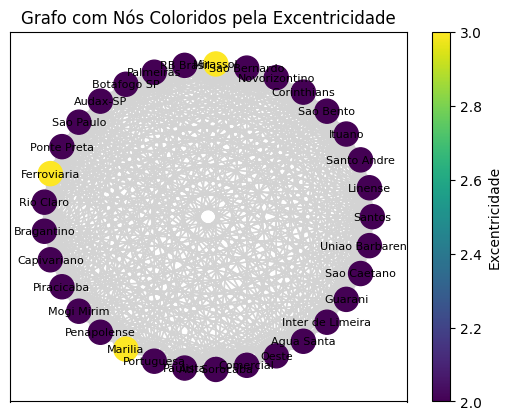

In [ ]:
plot_exc(G1)

### Gráfico das Excentricidades dos vértices de G2

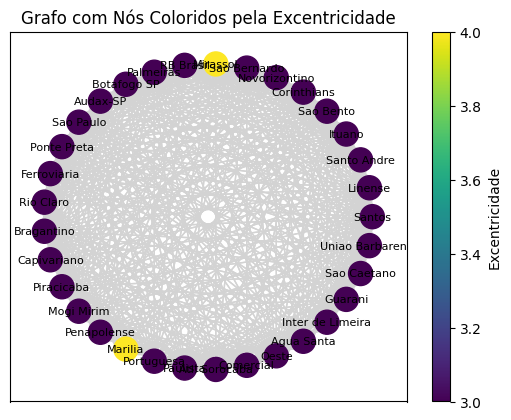

In [ ]:
plot_exc(G2)

## Gráficos para visualizar as Centralidades de Excentricidade

In [ ]:
def plot_ce_ect(grafo):
    # Calcular a excentricidade dos nós
    ec = list(nx.eccentricity(grafo).keys())
    ec_1 = nx.eccentricity(grafo, weight = 'weight')
    # Calcular a Centralidade de Proximidade dos Nós
    cec = {chave: 1/ec_1[chave] for chave in ec}.values()
    # Plotar o histograma
    plt.hist(cec, bins=10, edgecolor='black')
    plt.title('Distribuição da Centralidade de Excentricidade dos Nós')
    plt.xlabel('Centralidade de Excentricidade')
    plt.ylabel('Frequência')
    plt.show()


### Histograma para visualizar as Centralidades de Excentricidade de G1

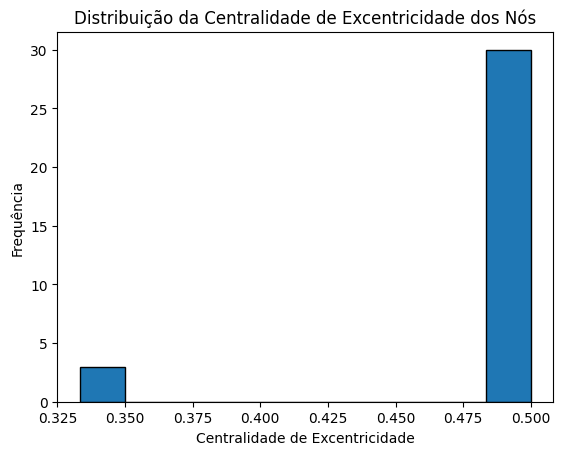

In [ ]:
plot_ce_ect(G1)

### Histograma para visualizar as Centralidades de Excentricidade de G2

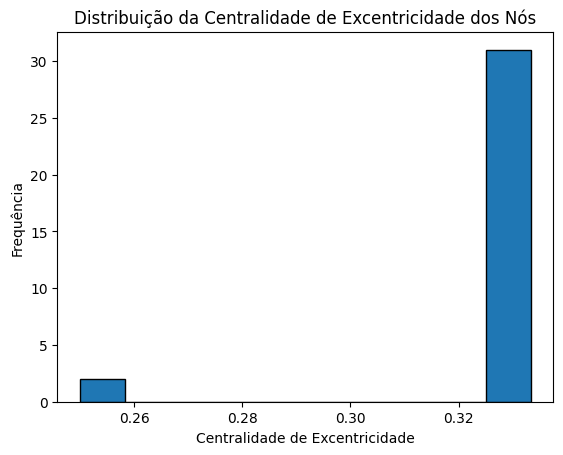

In [ ]:
plot_ce_ect(G2)

## Gráficos para visualizar as Centralidades de Proximidade

In [ ]:
def plot_ce_prox(grafo):
    # Calcular a centralidade de proximidade dos nós
    cp = nx.closeness_centrality(grafo)
    node_color = [cp[n] for n in grafo.nodes()]

    # Desenhar o grafo
    pos = nx.kamada_kawai_layout(grafo)

    fig, ax = plt.subplots()
    nodes = nx.draw_networkx_nodes(grafo, pos, node_color=node_color, cmap=plt.cm.viridis, node_size=300, ax=ax)
    edges = nx.draw_networkx_edges(grafo, pos, ax=ax, edge_color = 'lightgray')
    labels = nx.draw_networkx_labels(grafo, pos, ax=ax, font_size=8)

    # Adicionar a colorbar
    sm = cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
    sm.set_array([])
    fig.colorbar(sm, ax=ax, label='Centralidade de Proximidade')

    plt.title('Grafo com Nós Coloridos pela Centralidade de Proximidade')
    plt.show()

### Gráfico para visualizar as Centralidades de Proximidade de G1

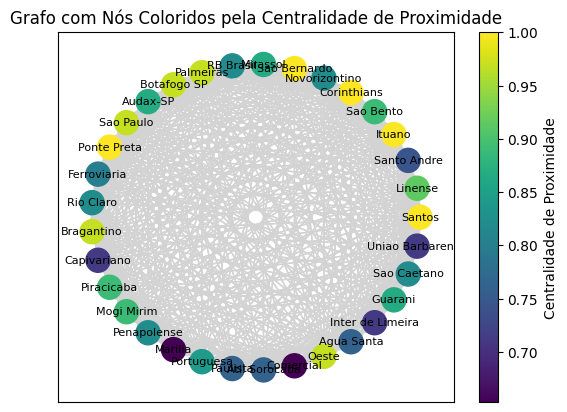

In [ ]:
plot_ce_prox(G1)

### Gráfico para visualizar as Centralidades de Proximidade de G2

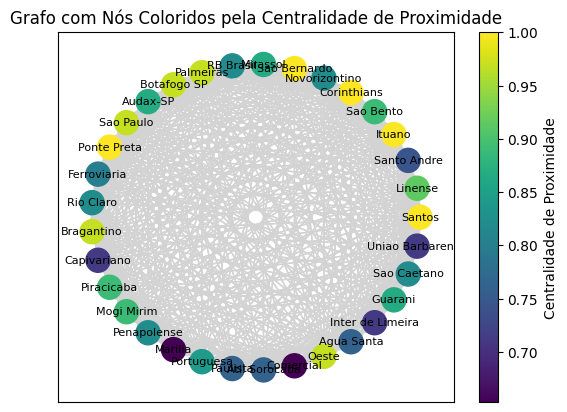

In [ ]:
plot_ce_prox(G2)

## Gráficos para visualizar as Centralidades Harmônicas dos Grafos

In [ ]:
def plot_ce_har(grafo):
    # Calcular a centralidade harmônica dos nós
    ch = nx.harmonic_centrality(grafo).values()
    # Plotar o histograma
    plt.hist(ch, bins=10, edgecolor='black')
    plt.title('Distribuição da Centralidade Harmônica dos Nós')
    plt.xlabel('Centralidade Harmônica')
    plt.ylabel('Frequência')
    plt.show()

### Histograma para visualizar as Centralidades Harmônicas de G1

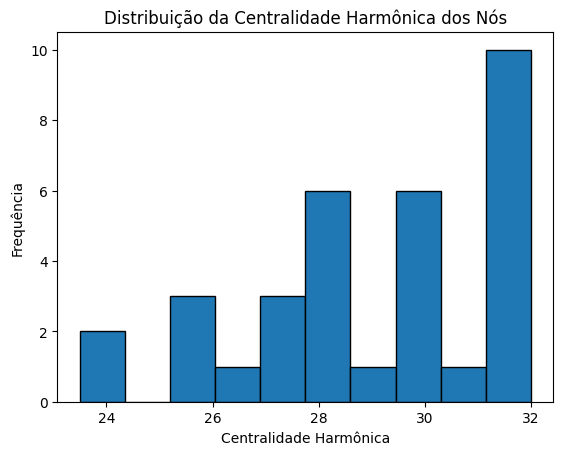

In [ ]:
plot_ce_har(G1)

### Histograma para visualizar as Centralidades Harmônicas de G2

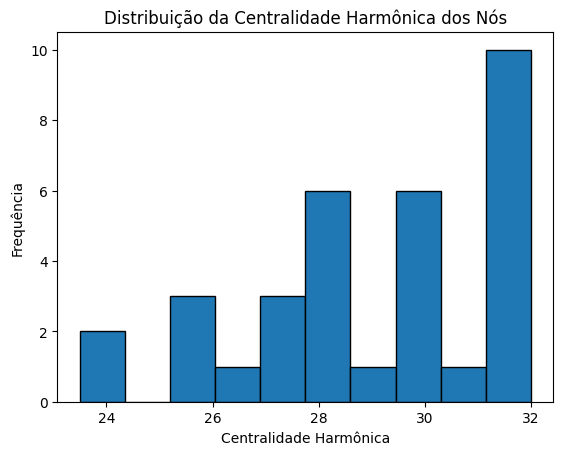

In [ ]:
plot_ce_har(G2)

## Gráficos para visualizar as Centralidades de Intermediação

In [ ]:
def plot_ce_ci(grafo):
    # Calcular a centralidade de intermediação dos nós
    cb = nx.betweenness_centrality(grafo,normalized = True, weight = 'weight')
    node_color = [cb[n] for n in grafo.nodes()]

    # Desenhar o grafo
    pos = nx.kamada_kawai_layout(grafo)

    fig, ax = plt.subplots()
    nodes = nx.draw_networkx_nodes(grafo, pos, node_color=node_color, cmap=plt.cm.viridis, node_size=300, ax=ax)
    edges = nx.draw_networkx_edges(grafo, pos, ax=ax, edge_color = 'lightgray')
    labels = nx.draw_networkx_labels(grafo, pos, ax=ax, font_size=8)

    # Adicionar a colorbar
    sm = cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
    sm.set_array([])
    fig.colorbar(sm, ax=ax, label='Centralidade de Intermediação')

    plt.title('Grafo com Nós Coloridos pela Centralidade de Intermediação')
    plt.show()

### Gráfico para visualizar as Centralidades de Intermediação de G1

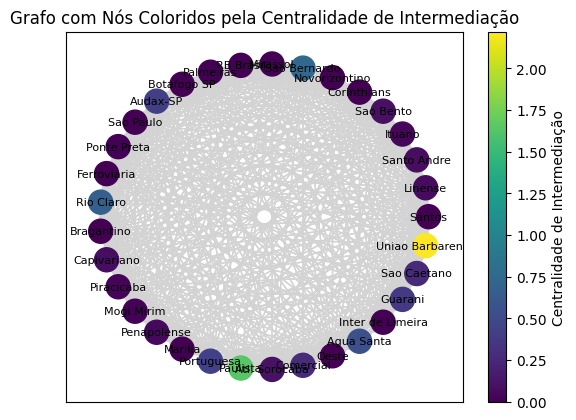

In [ ]:
plot_ce_ci(G1)

### Gráfico para visualizar as Centralidades de Intermediação de G2


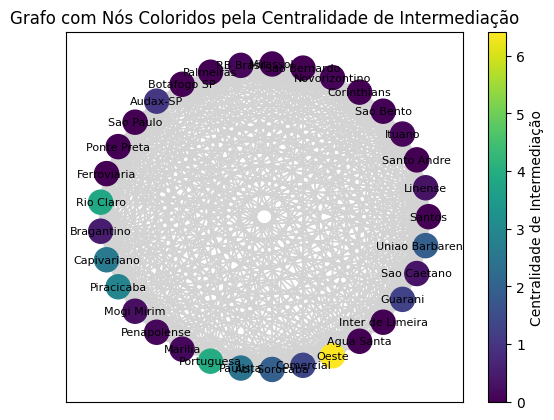

In [ ]:
plot_ce_ci(G2)

## Gráficos para visualizar o índice k-shell dos grafos

In [ ]:
def plot_ind_shell(grafo):
    # Calcular o índice k-shell dos vértices
    nucleos = nx.core_number(grafo).values()
    # Plotar o histograma
    plt.hist(nucleos, bins=10, edgecolor='black')
    plt.title('Distribuição do Índice K-Shell dos Nós')
    plt.xlabel('Índice K-Shell')
    plt.ylabel('Frequência')
    plt.show()

### Histograma para visualizar o Índice K-Shell de G1

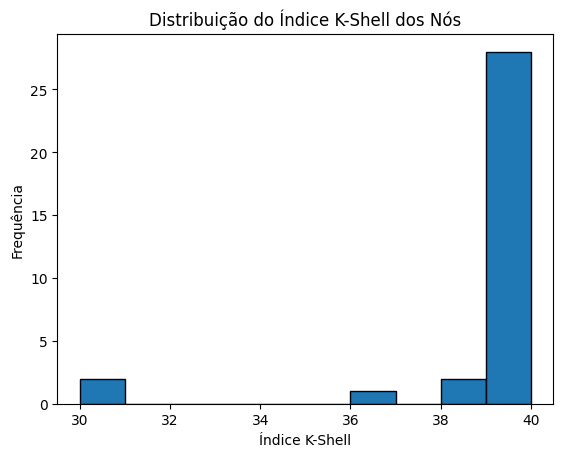

In [ ]:
plot_ind_shell(G1)

### Histograma para visualizar o Índice K-Shell de G2

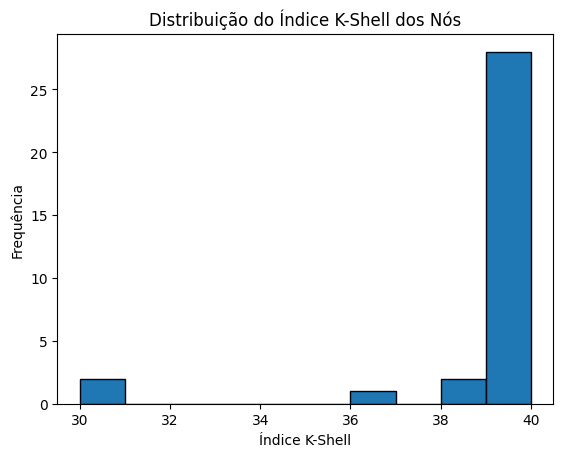

In [ ]:
plot_ind_shell(G2)

## Gráficos para visualizar as Centralidades de Katz dos grafos

In [ ]:
def plot_ce_inter(grafo):
    # Calcular a centralidade de Katz dos nós
    cev = nx.eigenvector_centrality_numpy(grafo, weight = 'weight')
    node_color = [cev[n] for n in grafo.nodes()]

    # Desenhar o grafo
    pos = nx.kamada_kawai_layout(grafo)

    fig, ax = plt.subplots()
    nodes = nx.draw_networkx_nodes(grafo, pos, node_color=node_color, cmap=plt.cm.viridis, node_size=300, ax=ax)
    edges = nx.draw_networkx_edges(grafo, pos, ax=ax, edge_color = 'lightgray')
    labels = nx.draw_networkx_labels(grafo, pos, ax=ax, font_size=8)

    # Adicionar a colorbar
    sm = cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
    sm.set_array([])
    fig.colorbar(sm, ax=ax, label='Centralidade de Katz')

    plt.title('Grafo com Nós Coloridos pela Centralidade de Katz')
    plt.show()

### Gráfico para visualizar as Centralidades de Katz de G1

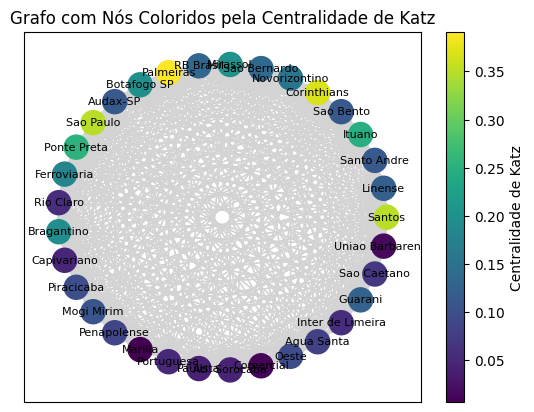

In [ ]:
plot_ce_inter(G1)

### Gráfico para visualizar as Centralidades de Katz de G2

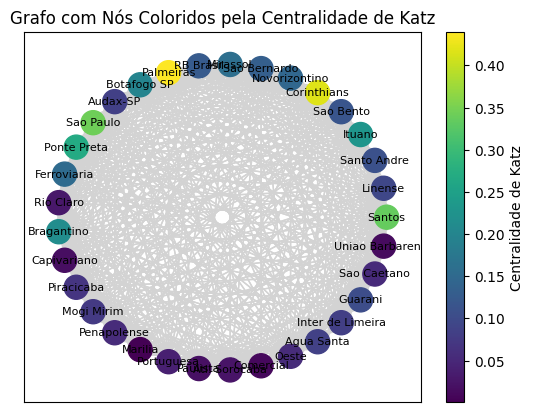

In [ ]:
plot_ce_inter(G2)

## Gráficos para visualizar os PageRank dos grafos

In [ ]:
def plot_pg_rank(grafo):
    # Calcular o PageRank dos nós
    pr = nx.pagerank(grafo, alpha=alpha, weight = 'weight')
    node_color = [pr[n] for n in grafo.nodes()]

    # Desenhar o grafo
    pos = nx.kamada_kawai_layout(grafo)

    fig, ax = plt.subplots()
    nodes = nx.draw_networkx_nodes(grafo, pos, node_color=node_color, cmap=plt.cm.viridis, node_size=300, ax=ax)
    edges = nx.draw_networkx_edges(grafo, pos, ax=ax, edge_color = 'lightgray')
    labels = nx.draw_networkx_labels(grafo, pos, ax=ax, font_size=8)

    # Adicionar a colorbar
    sm = cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
    sm.set_array([])
    fig.colorbar(sm, ax=ax, label='PageRank')

    plt.title('Grafo com Nós Coloridos pela PageRank')
    plt.show()

### Gráfico para visualizar os PageRank de G1

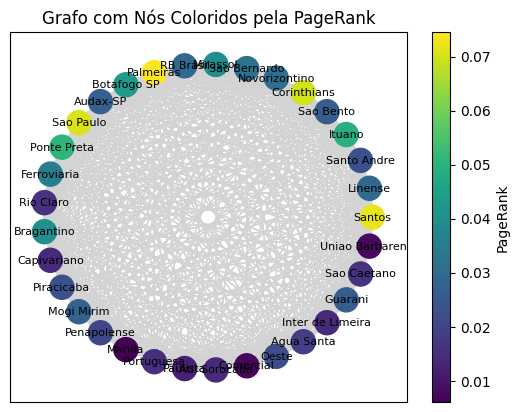

In [ ]:
plot_pg_rank(G1)

### Gráfico para visualizar os PageRank de G2

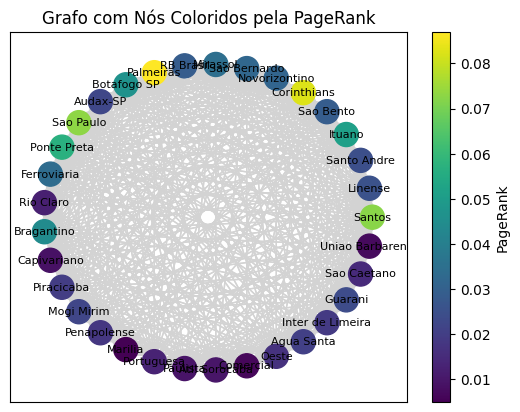

In [ ]:
plot_pg_rank(G2)

## Gráficos para visualizar os Coeficientes de Agrupamento Local dos grafos

In [ ]:
def plot_coef_local(grafo):
    # Calcular os Coeficientes de Agrupamento Local dos nós
    cal = nx.clustering(grafo, weight = 'weight')
    node_color = [cal[n] for n in grafo.nodes()]

    # Desenhar o grafo
    pos = nx.kamada_kawai_layout(grafo)

    fig, ax = plt.subplots()
    nodes = nx.draw_networkx_nodes(grafo, pos, node_color=node_color, cmap=plt.cm.viridis, node_size=300, ax=ax)
    edges = nx.draw_networkx_edges(grafo, pos, ax=ax, edge_color = 'lightgray')
    labels = nx.draw_networkx_labels(grafo, pos, ax=ax, font_size=8)

    # Adicionar a colorbar
    sm = cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
    sm.set_array([])
    fig.colorbar(sm, ax=ax, label='Coeficiente de Agrupamento LOcal')

    plt.title('Grafo com Nós Coloridos pelo Coeficiente de Agrupamento Local')
    plt.show()

### Gráfico para visualizar os Coeficientes de Agrupamento Local de G1

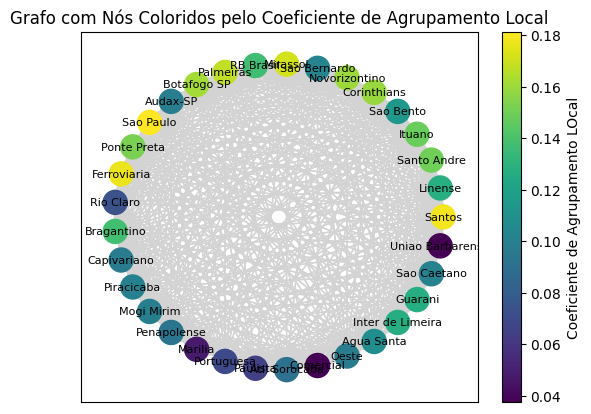

In [ ]:
plot_coef_local(G1)

### Gráfico para visualizar os Coeficientes de Agrupamento Local de G2

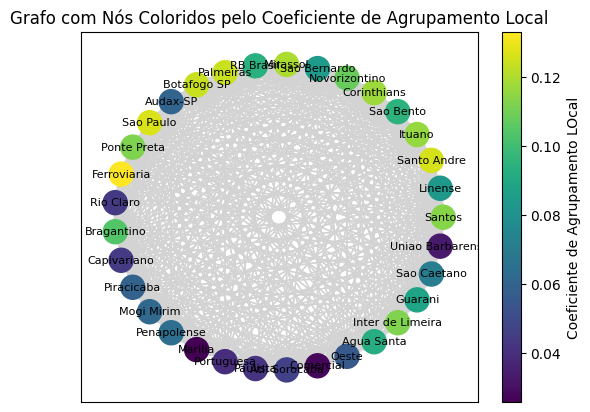

In [ ]:
plot_coef_local(G2)

# Questão 5
O relatório foi feito ao decorrer do trabalho.